# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [4]:
# Média e Evolução
df['media'] = df.mean(axis=1)
df['evolucao'] = df.p2 - df.p1
df.style.format(precision=1, decimal=',')
df.head(10)

,p1,p2,media,evolucao
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712
5,4.231065,3.433002,3.832033,-0.798063
6,9.807642,9.837325,9.822484,0.029683
7,6.848297,7.917613,7.382955,1.069316
8,4.809319,5.700025,5.254672,0.890706
9,3.921175,5.676061,4.798618,1.754886


In [5]:
# Correlação entre p1 e p2
df[['p1', 'p2']].corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [7]:
# Correlação entre média e evolução
df[['media', 'evolucao']].corr()

,media,evolucao
media,1.000000,0.133474
evolucao,0.133474,1.000000


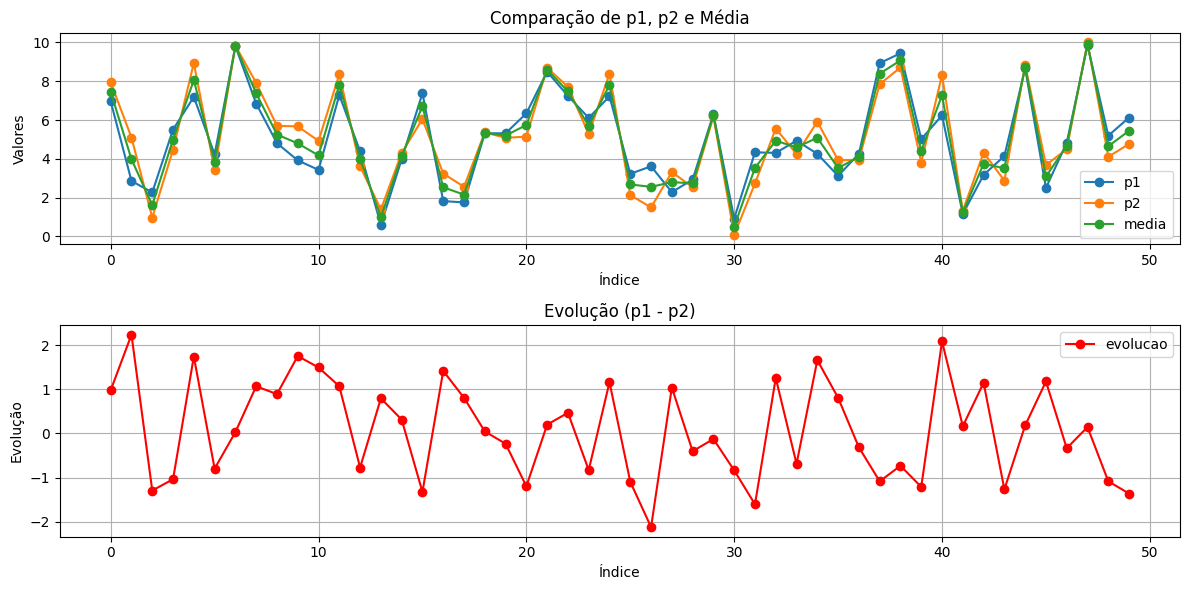

In [9]:
# Gráfico comparativo
plt.figure(figsize=(12, 6))

# Subplot para p1, p2 e média
plt.subplot(2, 1, 1)
plt.plot(df.index, df['p1'], label='p1', marker='o')
plt.plot(df.index, df['p2'], label='p2', marker='o')
plt.plot(df.index, df['media'], label='media', marker='o')
plt.title('Comparação de p1, p2 e Média')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)

# Subplot para evolução
plt.subplot(2, 1, 2)
plt.plot(df.index, df['evolucao'], label='evolucao', color='red', marker='o')
plt.title('Evolução (p1 - p2)')
plt.xlabel('Índice')
plt.ylabel('Evolução')
plt.legend()
plt.grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

* Correlação entre p1 e p2: a correlação alta (0,8957) indica que é uma correlação forte e positiva. Se estamos lidando com variáveis que deveriam ser independentes, essa alta correlação poderia indicar um problema.
* Correlação entre média e evolução: A baixa correlação (0.133474) indica que a diferença entre 𝑝1 e 𝑝2 não é fortemente influenciada pelos seus valores médios.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [8]:
df['soma'] = df.p1 + df.p2
df.head()

,p1,p2,media,evolucao,soma
0,6.964692,7.943428,7.454060,0.978736,14.908120
1,2.861393,5.099537,3.980465,2.238143,7.960930
2,2.268515,0.974429,1.621472,-1.294085,3.242944
3,5.513148,4.474359,4.993754,-1.038788,9.987507
4,7.194690,8.938402,8.066546,1.743712,16.133092


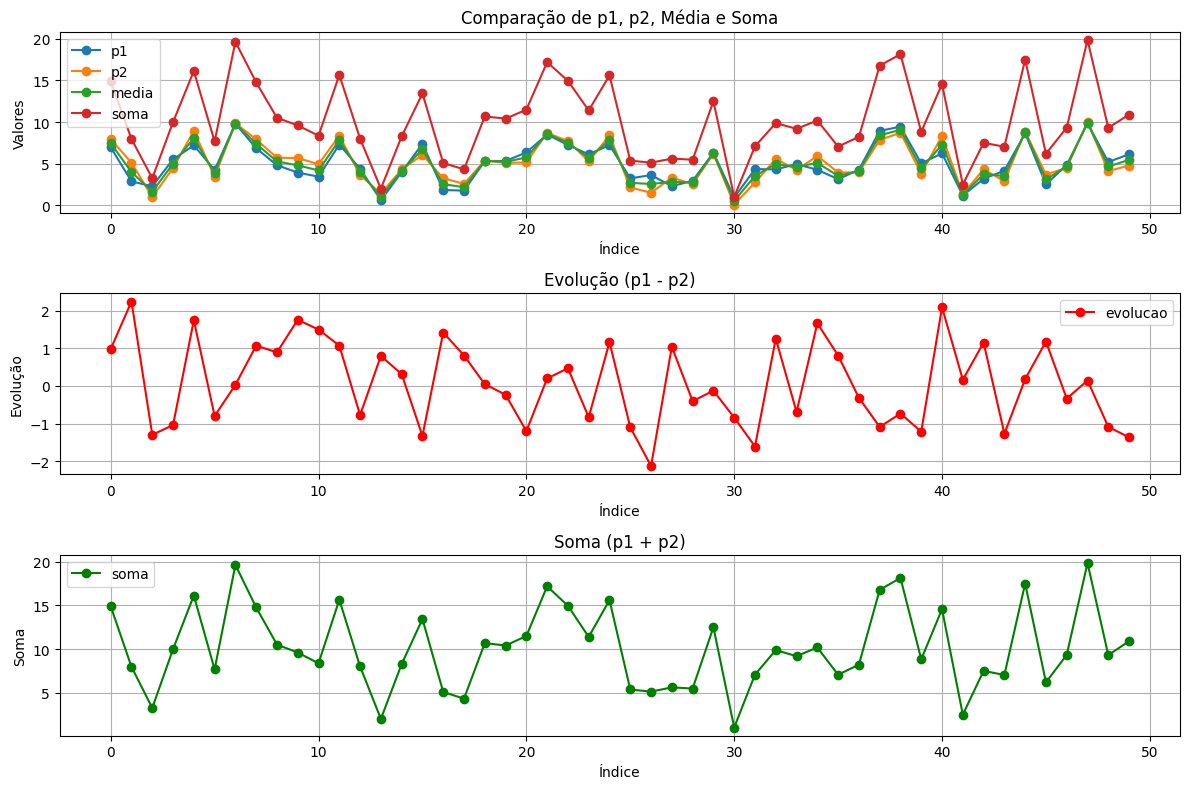

In [11]:
# Gráfico comparativo
plt.figure(figsize=(12, 8))

# Subplot para p1, p2, média e soma
plt.subplot(3, 1, 1)
plt.plot(df.index, df['p1'], label='p1', marker='o')
plt.plot(df.index, df['p2'], label='p2', marker='o')
plt.plot(df.index, df['media'], label='media', marker='o')
plt.plot(df.index, df['soma'], label='soma', marker='o')
plt.title('Comparação de p1, p2, Média e Soma')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)

# Subplot para evolução
plt.subplot(3, 1, 2)
plt.plot(df.index, df['evolucao'], label='evolucao', color='red', marker='o')
plt.title('Evolução (p1 - p2)')
plt.xlabel('Índice')
plt.ylabel('Evolução')
plt.legend()
plt.grid(True)

# Subplot para soma
plt.subplot(3, 1, 3)
plt.plot(df.index, df['soma'], label='soma', color='green', marker='o')
plt.title('Soma (p1 + p2)')
plt.xlabel('Índice')
plt.ylabel('Soma')
plt.legend()
plt.grid(True)

# Ajustar layout
plt.tight_layout()
plt.show();

Adicionando a soma aos gráficos, podemos ver claramente como a soma (𝑝1 + 𝑝2) se comporta em relação aos valores individuais e à média. A soma proporciona uma visão mais direta da contribuição combinada de p1 e p2, destacando sua relação aditiva e como eles variam conjuntamente. A evolução ainda mostra a diferença entre os valores, mas a soma reflete sua interação cumulativa